# **1. INTRODUCTION**

# a. Defining the question

Predict the chance of survival of the passengers from the provided titanic dataset uaing the KNearest Neighbors algorithm as our our classifier

# b. Defining the Metric for success

Our model will be considered a success if our model gives an accouracy score of above 80%

# c. Understanding the context


The column description of the titanic dataset provided is as follows

survival (0 = No, 1 = Yes)

pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

sex

Age - Age in years

sibsp - # of siblings / spouses aboard the Titanic

parch - # of parents / children aboard the Titanic

ticket - Ticket number

fare - Passenger fare

cabin - Cabin number

embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# d. Data Relevance

# e. Recording the Experimental Design



a) Business Understanding

b) Data Understanding

c) Data Cleaning

d) EDA

e) Modeling

f) Evaluation


# **2. READING THE DATASET**

# Importing libraries

In [2]:
# importing the python libraries we shall need
import pandas as pd
import numpy as np

# we also import visualization libraries
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [6]:
titanic=pd.read_csv('train.csv')
# preview the head of the titanic dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **3. DATA UNDERSTANDING**

In [7]:
# previewing the number of records in our titanic dataset
print('Our titanic train dataset has:'+str(titanic.shape))

Our titanic train dataset has:(891, 12)


In [8]:
# previewing the datatypes of each column
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

From the output, we can see that most of our features have the desired data types

# **4. EXTERNAL DATA SOURCE VALIDATION**

# **5. DATA CLEANING**

Label encoding 

In [11]:
#we use label encoding to change the sex and embarked categorical data to integers
#  We shall encode the 'sex' and 'embarked' columns to integers
# we start by importing the library to be used

from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

titanic['Sex']=encoder.fit_transform(titanic['Sex'])
titanic['Embarked'] = titanic['Embarked'].replace({'S':0, 'C':1, 'Q':2})

# Checking for Missing data

In [12]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


We can see that the cabin, age and embarked columns have missing values.

The Cabin column has the highest number of missing values(687), while the age column has 177 and embarked has only 2 missing values

however, we shall not drop the missing values for now since they can be useful in further understanding of the data

# Checking for Outliers

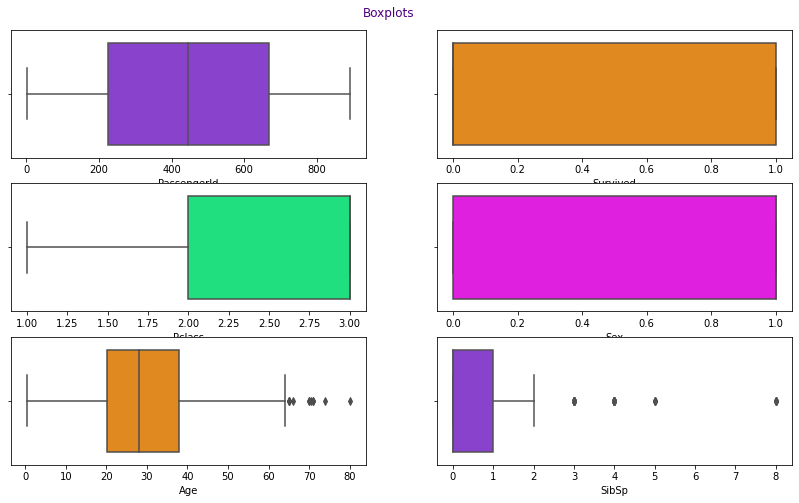

In [38]:
# using boxplots to check for outliers
# we create a list of columns that we will use for checking the outliers
# first, assign the column features to columns and colors for each column boxplot

columns = ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']
colors = ['blueviolet', 'darkorange', 'springgreen','fuchsia', 'darkorange', 'blueviolet', 'springgreen']

# now, we plot boxplots of the columns to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (14, 8))
plt.suptitle('Boxplots', fontsize = 12, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), titanic, columns, colors):
  sns.boxplot(titanic[column], ax = ax, color = color)
  ax.set_facecolor('white')

The boxplot outputs reveal that the Age and SibSp(Siblings and spouses) columns have outliers

# Checking for Anomalies

In [39]:
# we check the duplicates in our titanic train dataset
print(titanic.duplicated().any())

False


We do not have any duplicates in our dataset hence we proceed with our analysis

Dropping Unnecessary columns in our dataset

Columns such as Cabin, Ticket, PassengerId, Name and Fare are not important for our analysis, we therefor drop them

In [40]:
train=titanic.drop(['PassengerId','Name','Cabin', 'Fare','Ticket'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,0.0
1,1,1,0,38.0,1,0,1.0
2,1,3,0,26.0,0,0,0.0
3,1,1,0,35.0,1,0,0.0
4,0,3,1,35.0,0,0,0.0


In [83]:
# previewing the missing values in the new dataset
print(train.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64


As we saw above, the age and Embarked columns still have the missing values. we have dropped the Cabin column because it was not essential for our analysis.

since the embarked column has only 2 missing values, we shall drop those values

In [100]:
titan=train.dropna(subset=['Embarked'])
titan.Embarked.nunique()

3

It means we have only 3 unique entries in the Embarked column, that is, C for Cherbourg, S for Southampton and Q for Queentown

# **6. EXPLORATORY DATA ANALYSIS**

In [101]:
# let's preview the head of our new dataset
titan.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,0.0
1,1,1,0,38.0,1,0,1.0
2,1,3,0,26.0,0,0,0.0
3,1,1,0,35.0,1,0,0.0
4,0,3,1,35.0,0,0,0.0


In [102]:
# previewing the statistical summary of our new dataset
titan.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.159921,0.524184,0.382452,0.362205
std,0.486260,0.834700,0.477538,13.157050,1.103705,0.806761,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,36.500000,1.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


Survived    0    1
Sex               
0          81  231
1         468  109


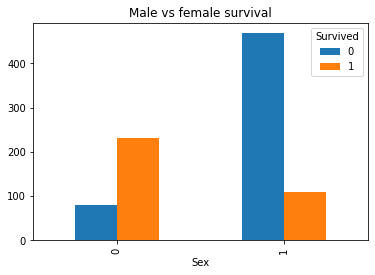

In [103]:
# plotting a cross table to evaluate the gender survival
from scipy import stats

gender=pd.crosstab(titan['Sex'], titan['Survived'])
print(gender)

gender.plot(kind = 'bar', title = 'Male vs female survival')


The output above reveals that the number of males who survived are more than the number of females

Survived    0    1
Embarked          
0.0       427  217
1.0        75   93
2.0        47   30


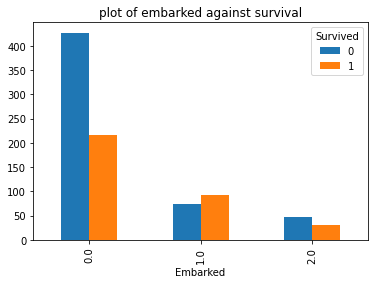

In [105]:
# plotting the crosst tab for the relationship between embarked and survival
embarked = pd.crosstab(titan['Embarked'],titan['Survived'])
print(embarked)

embarked.plot(kind = 'bar', title = 'plot of embarked against survival')

S=0, C=1, Q=2 

From the output, we can see that Southampton had the highest entries of both survival and those who did not survive

Survived    0    1
Pclass            
1          80  134
2          97   87
3         372  119


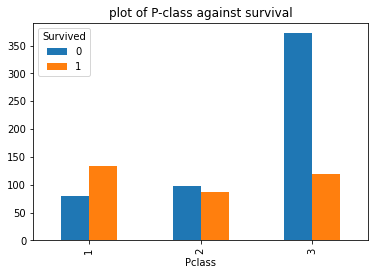

In [104]:
# plotting the crosst tab for the relationship between P-class and survival
p_class = pd.crosstab(titan['Pclass'],titan['Survived'])
print(p_class)

p_class.plot(kind = 'bar', title = 'plot of P-class against survival')

The people in the 3rd class are the most affected as high percentage did not survive compared to the first and second class. 

Survived    0    1
Parch             
0         445  231
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0


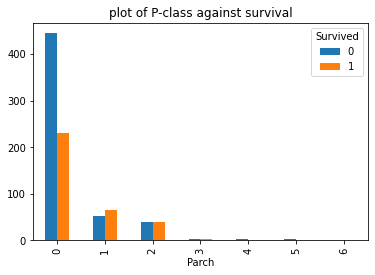

In [106]:
# plotting the crosst tab for the relationship between Parent/children and survival
parch= pd.crosstab(titan['Parch'],titan['Survived'])
print(parch)

parch.plot(kind = 'bar', title = 'plot of P-class against survival')

We can see that those parents without children are the highest who did not survive and also had most of the survival unlike those with many children. The parent/child survival decreases as the number of children increase

Survived    0    1
SibSp             
0         398  208
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


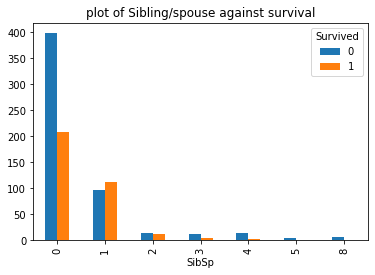

In [107]:
# plotting the crosst tab for the relationship between Sibling/spouse and survival
sp= pd.crosstab(titan['SibSp'],titan['Survived'])
print(sp)
sp.plot(kind = 'bar', title = 'plot of Sibling/spouse against survival')

Just like the parent/children column, those with no siblings or spouse percentage of those who survived and those who didn't. The value of survival decreases with increase in siblings/spouse

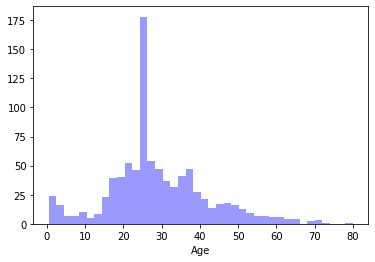

In [108]:
# For our age column with a high number of missing values;
#First, we plot the distribution of age column to see how age is distribututed before imputing
# with the right values
# We will workout the code with the dropna() clause to see how the data is distributed
# 
sns.distplot(titan['Age'].dropna(),kde=False,color='blue',bins=40)

The plot above reveals that age is skewed to the left, meaning that the highest percentage of the people on board are between 15-35 years

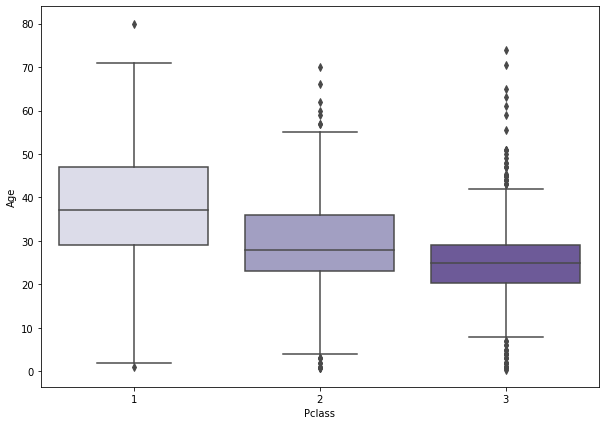

In [109]:
# Second, we plot a boxplot to preview the distribution of age in the different classes
# this will help us to figure out the age quantile for each class,
# which we shall use iteration to impute the missing values in age column
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass',y='Age',data=titan,palette='Purples')

We can see that in the first class, the mean age is around 38, for the second class is 28 and 25 for the third class

In [111]:
# In order to impute the missing values,
# we create a fucntion to iterate through the 3 classes
# 
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 28

        else:
            return 25

    else:
        return Age
# Applying the function above
titan['Age'] = titan[['Age','Pclass']].apply(impute_age,axis=1) 

# Checking for collinearity of features

In [113]:
# we first check the correlation between variables using the correlation matrix
corr=titan.corr()
print(corr)

          Survived    Pclass       Sex       Age     SibSp     Parch  Embarked
Survived  1.000000 -0.335549 -0.541585 -0.055394 -0.034040  0.083151  0.108669
Pclass   -0.335549  1.000000  0.127741 -0.397224  0.081656  0.016824  0.043835
Sex      -0.541585  0.127741  1.000000  0.084759 -0.116348 -0.247508 -0.118593
Age      -0.055394 -0.397224  0.084759  1.000000 -0.241573 -0.172554 -0.035866
SibSp    -0.034040  0.081656 -0.116348 -0.241573  1.000000  0.414542 -0.060606
Parch     0.083151  0.016824 -0.247508 -0.172554  0.414542  1.000000 -0.079320
Embarked  0.108669  0.043835 -0.118593 -0.035866 -0.060606 -0.079320  1.000000


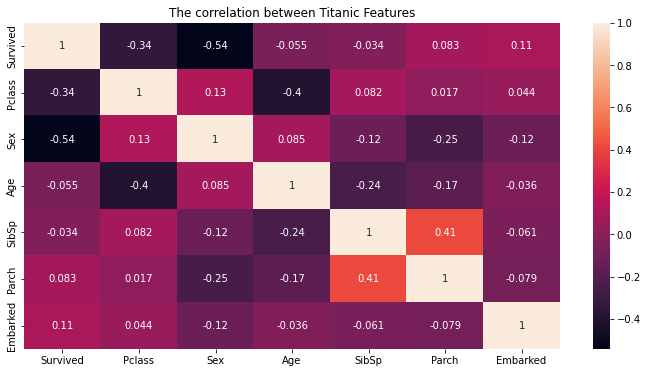

In [114]:
# we shall use the heatmap to visualize the correlation between the different variables
plt.figure(figsize=(12,6))
sns.heatmap(titan.corr(), annot=True)
plt.title('The correlation between Titanic Features')
plt.show()

From the output, it is clear that the correlation between the titanic features is good enough as none is near 5 which could affect our model performance.

# 7. **Implementing** the Solution

Logistic Regression

In [115]:
print(titan.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64


In [122]:
# we shall create a baseline model that we shall use to compare to the model performance of the other models that we shall create.
# we are going to logistic regression since our target variable 'survived' is in binary
# let's import the libraries that we shall need

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score,mean_absolute_error, mean_squared_error


In [117]:
# we start by defining our X and y variables below:
# X=independent variable and y=target variable
#
# 
X = titan.drop(columns = ['Survived'], axis=1)
y = titan['Survived']
# 
# Split data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
# 
# we then standardize the X_train and the X_test to the same scale
titanic = StandardScaler()
# 
# now, we train our model using .fit_transform() method
# 
X_train = titanic.fit_transform(X_train)
X_test = titanic.transform(X_test)
#
# fit the model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
# 
# Making predictions using the model above
# 
pred = logmodel.predict(X_test)
# 
# Getting the accuracy of our model
print("The logistic Regression model is", accuracy_score(y_test,pred))

The logistic Regression model is 0.7191011235955056


Our baseline model has an accuracy score of 71.91% in making predictions. We shall use this accuracy score to compare to the models we create using KNearest Neighbors(KNN)

# KNearest Neighbors Classifier

With KNN, we can classify new data points based on similarity measures

In [123]:
# let's import the libraries we shall use here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [120]:
# First, we split the dataset into attributes and labels where;
# X= independent features and y= dependent feature
# 
X = titan.iloc[:, 1:7 ].values
y = titan.iloc[:, 0].values
# 
# Second, Split data into train and test
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
# 
# Third, Feature Scaling before making any actual predictions so that all of them can be uniformly evaluated.
# 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Fourth, Fit the data
# 
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [124]:
# Making predictions 
# 
y_pred_Knn = classifier.predict(X_test)
# 
# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred_Knn))
print(classification_report(y_test, y_pred_Knn))

[[96 14]
 [22 46]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.68      0.72        68

    accuracy                           0.80       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.80      0.80      0.79       178



The confusion matrix reveals that the model can make 142 predictions with 36 off, which is not bad.

our KNN model is 80.0% accurate as compared to our regression baseline model which is 71.91%.

We can assume that KNN is a better classifier as compared to Logistic Regression

# Performimg Linear Discriminant Analysis(LDA)

In machine learning, this technique is used in supervised classification to improve the performance of a model

In [127]:
# libraries to be used
from locale import normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [128]:
# We first define the independent and dependent variable to be used 

D = titan.iloc[:, 1:7].values
y = titan.iloc[:, 0].values
# 
# We then divide the data to train and test

X_train, X_test, y_train, y_test = train_test_split(D, y, test_size=0.2, random_state=0, stratify=y)

# Performing feature scaling which is done on the independent variables to normalize the data to a particular range

normalize = StandardScaler()
X_train = normalize.fit_transform(X_train)
X_test = normalize.transform(X_test)

In [129]:
# Then, perfom Linear Discriminant Analysis(LDA)
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
# 
# we then train our model before Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown 

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [130]:
# Having import required libraries
# we evaluate the performance
# We evaluate our model by getting  a confusion matrix and finding the accuracy of the prediction.
# 

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix )
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[103   7]
 [ 20  48]]
Accuracy0.848314606741573


As per our output matrix, our model can do 151 correct predictions, with 27 off predictions

However, our model has improved its accuracy to 84.8% which means it does well in making predictions as compared to our regression baseline model and also the KNN prediction

# 8. **CHALLENGING THE SOLUTION**